# Idiomatic Pandas
## 5 Tips for Better Pandas Code

https://github.com/mattharrison/2023-scipy-pandas

In [1]:
%matplotlib inline
from IPython.display import display
import numpy as np
import pandas as pd
import pyarrow

import io
import zipfile
#import modin.pandas as pd

In [13]:
# a glorious function
# add ordered categories to this
def tweak_gss(gss):
    income_cats = ['No answer', '0', '1000', '3000', '4000', '5000', '6000', '7000', 
               '8000', '10000', '15000', '20000', '25000']
    return (gss
      .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})           
     .assign(INCOME=lambda a_df: a_df.INCOME.cat.reorder_categories(income_cats, ordered=True),
            TICKET=lambda a_df: a_df.TICKET.str.upper().astype('string[pyarrow]'),
             **{'INCOME INT': lambda a_df: a_df.INCOME.replace('No answer', np.nan).astype('int64[pyarrow]')}
             #**{'INCOME INT':lambda a_df: a_df.INCOME.replace('No answer', np.nan).astype('int64[pyarrow]')}
            #INCOME_INT=lambda a_df: a_df.INCOME.replace('No answer', np.nan).astype('int64[pyarrow]')
            )
           )
    #return (gss
    #  .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
    #         'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
    #         'MAJOR1': 'category',
    #          **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
    #                'INCOME', 'INCOME06', 'HONEST','TICKET']}})
    #           )
gss_raw = pd.read_csv('GSS.csv', index_col=0, dtype_backend='pyarrow', engine='pyarrow')
gss = tweak_gss(gss_raw)

In [10]:
def add(x,y):
    return x + y

x = 5
y = 10
add(x, y)

15

In [11]:
args = {"x": 10, 'y': 5}
add(**args)

15

In [9]:
gss

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET,INCOME INT
,,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,NO ANSWER,<NA>
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER,25000
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER,25000


In [5]:
gss.dtypes

YEAR        uint16[pyarrow]
ID          uint16[pyarrow]
AGE          uint8[pyarrow]
HRS1         uint8[pyarrow]
OCC         uint16[pyarrow]
MAJOR1             category
SEX                category
RACE               category
BORN               category
INCOME             category
INCOME06           category
HONEST             category
TICKET      string[pyarrow]
dtype: object

## About Matt  Harrison @\_\_mharrison\_\_

* Author of Effective Pandas, Machine Learning Pocket Reference, and Illustrated Guide to Python 3.
* Advisor at Ponder (creators of Modin)
* Corporate trainer at MetaSnake. Taught Pandas to 1000's of students.

## Practice this on your data with your team!
* Contact me matt@metasnake.com
* Follow on Twitter @\_\_mharrison\_\_

## Outline

* Load Data
* Types
* Chaining
* Mutation
* Apply
* Aggregation

## Imports

In [1]:
%matplotlib inline
from IPython.display import display
import numpy as np
import pandas as pd
import pyarrow

import io
import zipfile
#import modin.pandas as pd

In [2]:
pd.__version__

'2.0.2'

In [3]:
pyarrow.__version__

'12.0.0'

## Data

Don't need to run this, but this is how I created the data

In [ ]:
# https://gss.norc.org/get-the-data/stata
# takes a few minutes on my computer to load
path = '~/Downloads/gss_spss_with_codebook.zip'
with zipfile.ZipFile(path) as z:
    print(z.namelist())
    with open('gss.sav', mode='bw') as fout:
        fout.write(z.open('GSS7218_R3.sav').read())
    gss = pd.read_spss('gss.sav')

In [ ]:
!pip install pyreadstat

In [ ]:
%%time
import pyreadstat
gss, meta = pyreadstat.read_sav('gss.sav')

In [ ]:
gss.shape

In [ ]:
gss.to_feather('gss.fth')

In [ ]:
%%time
raw = pd.read_feather('~/Dropbox/work/jupyter/gss.fth')

In [ ]:
raw

In [ ]:
# 6000 columns!
raw.shape

In [ ]:
cols = ['YEAR','ID','AGE', 'HRS1','OCC','MAJOR1','SEX','RACE','BORN','INCOME',
        'INCOME06','HONEST','TICKET']

raw[cols].to_feather('honest.fth')

## Loading Data

In [ ]:
raw = pd.read_feather('honest.fth', dtype_backend='pyarrow')

## My Cleanup
See GSS_Codebook.pdf for explanation

Columns:

* YEAR
* ID - RESPONDENT ID NUMBER
* AGE - AGE OF RESPONENT
* HRS1 - NUMBER OF HOURS WORKED LAST WEEK
* OCC - R'S CENSUS OCCUPATION CODE (1970) - Page 126 (VAR: OCC) see page 125 for notes APPENDIX F,G,H
   Appendix F - Page 3286
* MAJOR1 - COLLEGE MAJOR 1
* SEX - RESPONDENTS SEX
* RACE - RACE OF RESPONDENT
* BORN -  WAS R BORN IN THIS COUNTRY
* INCOME - TOTAL FAMILY INCOME 1970
* INCOME06 - TOTAL FAMILY INCOME 2006
* HONEST - HONEST
* TICKET - EVER RECEIVED A TRAFFIC TICKET


In [ ]:
cols = ['YEAR','ID','AGE', 'HRS1','OCC','MAJOR1','SEX','RACE','BORN','INCOME',
        'INCOME06','HONEST','TICKET']

raw[cols].isna().mean()*100

In [ ]:
(raw
 [cols]
 .isna()
 .mean()*100
)

In [ ]:
MAJOR= '''RESPONSE PUNCH 1972-82 1982B 1983-87 1987B 1988-91 1993-98 2000-04 2006 2008 2010 2012 2014 2016 2018 ALL
Accounting/bookkeeping 1 0 0 0 0 0 0 0 0 0 0 28 32 30 29 119
Advertising 2 0 0 0 0 0 0 0 0 0 0 3 2 0 0 5
Agriculture/horticulture 3 0 0 0 0 0 0 0 0 0 0 8 2 7 5 22
Allied health 4 0 0 0 0 0 0 0 0 0 0 0 2 1 0 3
Anthropology 5 0 0 0 0 0 0 0 0 0 0 3 5 1 1 10
Architecture 6 0 0 0 0 0 0 0 0 0 0 2 3 5 3 13
Art 7 0 0 0 0 0 0 0 0 0 0 6 7 11 10 34
Biology 8 0 0 0 0 0 0 0 0 0 0 16 22 33 26 97
Business administration 9 0 0 0 0 0 0 0 0 0 0 90 142 172 138 542
Chemistry 11 0 0 0 0 0 0 0 0 0 0 5 8 10 4 27
Communications/speech 12 0 0 0 0 0 0 0 0 0 0 20 18 26 18 82
Comm. disorders 13 0 0 0 0 0 0 0 0 0 0 4 6 2 2 14
Computer science 14 0 0 0 0 0 0 0 0 0 0 25 24 33 17 99
Dentistry 15 0 0 0 0 0 0 0 0 0 0 2 4 3 5 14
Education 16 0 0 0 0 0 0 0 0 0 0 73 91 97 79 340
Economics 17 0 0 0 0 0 0 0 0 0 0 11 19 13 19 62
Engineering 18 0 0 0 0 0 0 0 0 0 0 47 49 47 54 197
English 19 0 0 0 0 0 0 0 0 0 0 23 26 27 24 100
Finance 20 0 0 0 0 0 0 0 0 0 0 7 15 14 16 52
Foreign language 21 0 0 0 0 0 0 0 0 0 0 4 8 6 5 23
Forestry 22 0 0 0 0 0 0 0 0 0 0 1 0 3 0 4
Geography 23 0 0 0 0 0 0 0 0 0 0 0 2 2 4 8
Geology 24 0 0 0 0 0 0 0 0 0 0 1 3 4 2 10
History 25 0 0 0 0 0 0 0 0 0 0 10 19 14 19 62
Home economics 26 0 0 0 0 0 0 0 0 0 0 0 0 3 2 5
Industry & techn 27 0 0 0 0 0 0 0 0 0 0 3 4 6 0 13
Journalism 28 0 0 0 0 0 0 0 0 0 0 5 6 6 4 21
Law 29 0 0 0 0 0 0 0 0 0 0 13 18 23 14 68
Law enforcement 30 0 0 0 0 0 0 0 0 0 0 3 5 4 2 14
Library science 31 0 0 0 0 0 0 0 0 0 0 4 5 2 3 14
Marketing 32 0 0 0 0 0 0 0 0 0 0 11 15 13 12 51
Mathematics 33 0 0 0 0 0 0 0 0 0 0 5 10 12 5 32
Medicine 34 0 0 0 0 0 0 0 0 0 0 9 25 12 11 57
Music 35 0 0 0 0 0 0 0 0 0 0 4 2 10 2 18
Nursing 36 0 0 0 0 0 0 0 0 0 0 36 39 60 51 186
Optometry 37 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Pharmacy 38 0 0 0 0 0 0 0 0 0 0 2 5 4 4 15
Philosophy 39 0 0 0 0 0 0 0 0 0 0 2 0 2 2 6
Physical education 40 0 0 0 0 0 0 0 0 0 0 9 6 16 6 37
Physics 41 0 0 0 0 0 0 0 0 0 0 3 6 7 4 20
Psychology 42 0 0 0 0 0 0 0 0 0 0 32 32 34 29 127
Political science/international relations 43 0 0 0 0 0 0 0 0 0 0 16 22 19 14 71
Sociology 44 0 0 0 0 0 0 0 0 0 0 9 15 10 12 46
Special education 45 0 0 0 0 0 0 0 0 0 0 5 3 5 2 15
Theater arts 46 0 0 0 0 0 0 0 0 0 0 6 2 3 1 12
Theology 47 0 0 0 0 0 0 0 0 0 0 6 6 13 8 33
Veterinary medicine 48 0 0 0 0 0 0 0 0 0 0 1 5 3 4 13
Liberal arts 49 0 0 0 0 0 0 0 0 0 0 8 16 12 10 46
Other 50 0 0 0 0 0 0 0 0 0 0 8 10 21 27 66
General sciences 51 0 0 0 0 0 0 0 0 0 0 10 13 15 14 52
Social work 52 0 0 0 0 0 0 0 0 0 0 7 17 24 7 55
General studies 53 0 0 0 0 0 0 0 0 0 0 2 5 7 7 21
Other vocational 54 0 0 0 0 0 0 0 0 0 0 5 11 6 5 27
Health 55 0 0 0 0 0 0 0 0 0 0 23 31 31 42 127
Industrial Relations 56 0 0 0 0 0 0 0 0 0 0 1 0 0 3 4
Child/Human/Family Development 57 0 0 0 0 0 0 0 0 0 0 11 3 7 7 28
Food Science/Nutrition/Culinary Arts 58 0 0 0 0 0 0 0 0 0 0 3 6 9 9 27
Environmental Science/Ecology 59 0 0 0 0 0 0 0 0 0 0 5 5 6 8 24
Social Sciences 60 0 0 0 0 0 0 0 0 0 0 4 2 7 5 18
Human Services/Human Resources 61 0 0 0 0 0 0 0 0 0 0 3 7 7 5 22
Visual Arts/Graphic Design/Design and Drafting 62 0 0 0 0 0 0 0 0 0 0 3 8 9 10 30
Fine Arts 63 0 0 0 0 0 0 0 0 0 0 4 5 5 6 20
Humanities 64 0 0 0 0 0 0 0 0 0 0 0 2 0 1 3
Ethnic studies 65 0 0 0 0 0 0 0 0 0 0 3 1 0 0 4
Educational administration 66 0 0 0 0 0 0 0 0 0 0 3 4 8 9 24
Television/Film 67 0 0 0 0 0 0 0 0 0 0 0 2 6 1 9
Aviation/Aeronatics 68 0 0 0 0 0 0 0 0 0 0 2 1 1 3 7
Statistics/Biostatistics 69 0 0 0 0 0 0 0 0 0 0 0 0 2 2 4
Criminology/Criminal Justice 70 0 0 0 0 0 0 0 0 0 0 13 17 17 13 60
Administrative Science/Public Administration 71 0 0 0 0 0 0 0 0 0 0 2 11 3 5 21
Electronics 72 0 0 0 0 0 0 0 0 0 0 6 6 5 9 26
Urban and Regional Planning 73 0 0 0 0 0 0 0 0 0 0 1 1 3 2 7
Mechanics/Machine Trade 74 0 0 0 0 0 0 0 0 0 0 0 1 1 4 6
Dance 75 0 0 0 0 0 0 0 0 0 0 1 0 1 1 3
Gerontology 76 0 0 0 0 0 0 0 0 0 0 1 0 1 1 3
Public Relations 77 0 0 0 0 0 0 0 0 0 0 3 1 2 1 7
Textiles/Cloth 78 0 0 0 0 0 0 0 0 0 0 3 4 0 0 7
Parks and Recreation 79 0 0 0 0 0 0 0 0 0 0 1 2 1 0 4
Information Technology 80 0 0 0 0 0 0 0 0 0 0 0 5 8 11 24
Fashion 81 0 0 0 0 0 0 0 0 0 0 0 0 3 1 4
Counseling 82 0 0 0 0 0 0 0 0 0 0 0 0 11 9 20
Don't know/UNCODED 98 0 0 0 0 0 0 0 0 0 0 2 3 0 0 5
No answer 99 0 0 0 0 0 0 0 0 0 0 0 1 5 3 9
Not applicable 0 13626 354 7542 353 5907 10334 8394 4510 2023 2044 1263 1597 1795 1435 61177'''

# copy paste slight tweak from page 186
major_dict = {int(row.split()[-16]): ' '.join(row.split()[:-16])  for row in MAJOR.split('\n')[1:]}
major_dict

In [ ]:
raw.MAJOR1.value_counts()

In [ ]:
(raw
 [cols]
 .assign(
     MAJOR1=raw.MAJOR1.fillna(99).astype('int').replace(major_dict),
     SEX=raw.SEX#
           
           .astype(int)
           .replace({1:'Male', 2:'Female'}),
     RACE=raw.RACE.astype(int).replace({1:'White', 2:'Black', 3:'Other'}),
     OCC=raw.OCC.fillna(9999).astype(int),
     BORN=raw.BORN.fillna(4).astype(int).replace({1:'Yes', 2:'No', 3:'Don\'t Know',
                                                    4:'No answer', 5:'Not applicable'}),
     INCOME=raw.INCOME.fillna(99).astype(int).replace({99:'No answer', **dict(enumerate(['Not applicable',
                                                                                  0,1000,3000,4000,5000,6000,
                                                                                  7000,8000,10000,15000,20000,25000,]))}),
     INCOME06=raw.INCOME06.fillna(26).astype(int).replace({26:'Refused', **dict(enumerate(['Not applicable',
                                                                                  0,1000,3000,4000,5000,6000,
                                                                                  7000,8000,10000,12500,15000,
                                                                                  17500,20000,22500,25000,30_000,
                                                                                  35_000, 40_000, 50_000, 60_000,
                                                                                 75_000, 90_000, 110_000, 130_000,
                                                                                 150_000]))}),
     HONEST=raw.HONEST.fillna(9).astype(int).replace({1:'Most desirable', 2:'3 most desireable',
                                                                   3:'Not mentioned', 4:  '3 least desireable',
                                                                   5: 'One least desireable',
                                                                    9:'No answer'}),
     TICKET=raw.TICKET.fillna(9).astype(int).replace({1:'Yes', 2:'No', 3:'Refused', 9: 'No answer'}),
     )
 .astype({'YEAR':int, 'ID': 'uint16[pyarrow]'})
 .to_csv('GSS.csv')
)

## Types
Getting the right types will enable analysis and correctness.


In [4]:
%%time
gss = pd.read_csv('GSS.csv', index_col=0, dtype_backend='pyarrow', engine='pyarrow')

CPU times: user 51.3 ms, sys: 10.5 ms, total: 61.8 ms
Wall time: 28.3 ms


In [7]:
pd.read_csv??

In [8]:
gss.dtypes

YEAR         int64[pyarrow]
ID           int64[pyarrow]
AGE         double[pyarrow]
HRS1        double[pyarrow]
OCC          int64[pyarrow]
MAJOR1      string[pyarrow]
SEX         string[pyarrow]
RACE        string[pyarrow]
BORN        string[pyarrow]
INCOME      string[pyarrow]
INCOME06    string[pyarrow]
HONEST      string[pyarrow]
TICKET      string[pyarrow]
dtype: object

In [12]:
gss.YEAR


0        1972
1        1972
2        1972
3        1972
4        1972
         ... 
64809    2018
64810    2018
64811    2018
64812    2018
64813    2018
Name: YEAR, Length: 64814, dtype: int64[pyarrow]

In [13]:
pd.Series([32, 'matt', pd.DataFrame, range])

0                                       32
1                                     matt
2    <class 'pandas.core.frame.DataFrame'>
3                          <class 'range'>
dtype: object

In [9]:
age = 47

In [10]:
type(age)

int

In [11]:
gss

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
0,1972,1,23.0,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1,1972,2,70.0,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
2,1972,3,48.0,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
3,1972,4,27.0,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
4,1972,5,61.0,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37.0,36.0,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer
64810,2018,2345,75.0,36.0,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer
64811,2018,2346,67.0,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


In [14]:
len(dir(gss))

443

In [15]:
len(dir(gss.YEAR))

412

In [18]:
len(set(dir(gss.YEAR)) & set(dir(gss)))

360

In [19]:
gss.memory_usage(deep=True)

Index       518512
YEAR        518512
ID          518512
AGE         526616
HRS1        526616
OCC         518512
MAJOR1      863001
SEX         590912
RACE        583326
BORN        504166
INCOME      603690
INCOME06    689894
HONEST      888283
TICKET      760844
dtype: int64

In [20]:
# 36 M (pandas 1)
# 8.6 M (Pandas 2)
gss.memory_usage(deep=True).sum()

8611396

## Ints

In [24]:
gss.select_dtypes(int).describe()

,YEAR,ID,OCC
count,64814.000000,64814.000000,64814.000000
mean,1994.939180,1151.810211,6418.583284
std,13.465368,828.030233,4618.278478
min,1972.000000,1.000000,1.000000
25%,1984.000000,507.000000,613.000000
50%,1996.000000,1029.500000,9999.000000
75%,2006.000000,1570.000000,9999.000000
max,2018.000000,4510.000000,9999.000000


In [27]:
# chaining
(gss
 .select_dtypes(int)
 #.median()
 .describe()
 #.round(1)
)

,YEAR,ID,OCC
count,64814.000000,64814.000000,64814.000000
mean,1994.939180,1151.810211,6418.583284
std,13.465368,828.030233,4618.278478
min,1972.000000,1.000000,1.000000
25%,1984.000000,507.000000,613.000000
50%,1996.000000,1029.500000,9999.000000
75%,2006.000000,1570.000000,9999.000000
max,2018.000000,4510.000000,9999.000000


In [ ]:
# can comb08 be an int8?
# Do completion on int
np.iinfo(np.uint)

In [28]:
np.iinfo(np.uint8)

iinfo(min=0, max=255, dtype=uint8)

In [29]:
np.iinfo(np.uint16)

iinfo(min=0, max=65535, dtype=uint16)

In [ ]:
# chaining
(gss
 .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]' })
 .select_dtypes(['uint16'])
 .describe()
)

In [30]:
# chaining
# use 'integer' so see all int-like columns
(gss
 .astype({#'YEAR': 'uint16[pyarrow]',
          'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]' }) 
 .select_dtypes(['integer'])  # see https://numpy.org/doc/stable/reference/arrays.scalars.html
 .describe()
)

,YEAR,ID,OCC
count,64814.000000,64814.000000,64814.000000
mean,1994.939180,1151.810211,6418.583284
std,13.465368,828.030233,4618.278478
min,1972.000000,1.000000,1.000000
25%,1984.000000,507.000000,613.000000
50%,1996.000000,1029.500000,9999.000000
75%,2006.000000,1570.000000,9999.000000
max,2018.000000,4510.000000,9999.000000


In [31]:
# Inspect memory usage
(gss
 .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]' }) 
 .memory_usage(deep=True)
 .sum()  # was 36M
)

7469050

In [ ]:
!pip install pyarrow

## Int Exercise
* Try converting *YEAR* to `'int8'`. What do the values look like?
* Try converting *YEAR* to `'int8[pyarrow]'`. What do the values look like?

In [36]:
(gss
 .astype({'YEAR': 'int8[pyarrow]'})
 .describe()
)

ArrowInvalid: Integer value 1972 not in range: -128 to 127: Error while type casting for column 'YEAR'

In [34]:
(gss
 .astype({'YEAR': 'int8'})
 .describe()
)

,YEAR,ID,AGE,HRS1,OCC
count,64814.000000,64814.000000,64586.000000,37506.000000,64814.000000
mean,-53.060820,1151.810211,46.099356,41.303711,6418.583284
std,13.465368,828.030233,17.534703,14.171808,4618.278478
min,-76.000000,1.000000,18.000000,0.000000,1.000000
25%,-64.000000,507.000000,31.000000,37.000000,613.000000
50%,-52.000000,1029.500000,44.000000,40.000000,9999.000000
75%,-42.000000,1570.000000,59.000000,48.000000,9999.000000
max,-30.000000,4510.000000,89.000000,89.000000,9999.000000


## Floats

In [37]:
(gss
.select_dtypes('float'))

,AGE,HRS1
,,
0,23.0,<NA>
1,70.0,<NA>
2,48.0,<NA>
3,27.0,<NA>
4,61.0,<NA>
...,...,...
64809,37.0,36.0
64810,75.0,36.0
64811,67.0,<NA>


In [38]:
# surprise! age and hours worked looks int-like
gss.HRS1.describe()

count    37506.000000
mean        41.303711
std         14.171808
min          0.000000
25%         37.000000
50%         40.000000
75%         48.000000
max         89.000000
Name: HRS1, dtype: double[pyarrow]

In [41]:
# opps! missing values
gss.HRS1.value_counts(dropna=False)

HRS1
<NA>    27308
40.0    12866
50.0     2806
60.0     1981
45.0     1858
        ...  
0.0         7
71.0        3
81.0        3
79.0        3
87.0        3
Name: count, Length: 91, dtype: int64[pyarrow]

In [45]:
42 + False

42

In [46]:
int(False)

0

In [47]:
41 + True

42

In [53]:
(gss
 .AGE
 .gt(50)
 .mean() * 100
# .sum()
)

38.33338494410554

In [54]:
(gss
 .isna()
 #.sum()
 .mean() *100
)

YEAR         0.000000
ID           0.000000
AGE          0.351776
HRS1        42.132873
OCC          0.000000
MAJOR1       0.000000
SEX          0.000000
RACE         0.000000
BORN         0.000000
INCOME       0.000000
INCOME06     0.000000
HONEST       0.000000
TICKET       0.000000
dtype: float64

In [55]:
(gss
 .loc[gss.HRS1.isna()]
)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
0,1972,1,23.0,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1,1972,2,70.0,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
2,1972,3,48.0,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
3,1972,4,27.0,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
4,1972,5,61.0,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64807,2018,2342,68.0,<NA>,9999,No answer,Female,White,Yes,8000,Refused,No answer,No answer
64808,2018,2343,19.0,<NA>,9999,No answer,Male,White,Yes,15000,Refused,No answer,No answer
64811,2018,2346,67.0,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


In [56]:
# where are they missing?
(gss
  .query('HRS1.isna() ')
)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
0,1972,1,23.0,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1,1972,2,70.0,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
2,1972,3,48.0,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
3,1972,4,27.0,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
4,1972,5,61.0,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64807,2018,2342,68.0,<NA>,9999,No answer,Female,White,Yes,8000,Refused,No answer,No answer
64808,2018,2343,19.0,<NA>,9999,No answer,Male,White,Yes,15000,Refused,No answer,No answer
64811,2018,2346,67.0,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


In [57]:
# where are they missing?
(gss
  .query('AGE.isna()')
)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
228,1972,229,<NA>,<NA>,280,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
344,1972,345,<NA>,<NA>,9999,No answer,Female,Black,No answer,No answer,Refused,No answer,No answer
1038,1972,1039,<NA>,<NA>,370,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1427,1972,1428,<NA>,<NA>,902,No answer,Male,Black,No answer,No answer,Refused,No answer,No answer
1553,1972,1554,<NA>,<NA>,395,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63124,2018,659,<NA>,<NA>,9999,No answer,Female,Black,Yes,25000,Refused,No answer,No answer
63906,2018,1441,<NA>,16.0,9999,No answer,Female,White,Yes,20000,Refused,No answer,No answer
63938,2018,1473,<NA>,40.0,9999,Business administration,Male,Black,Yes,25000,Refused,No answer,No answer


In [58]:
# where are they missing?
# It turns out that ID is not consistent across years
(gss
  .query('ID == 229')
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_28478/2332574712.py:4: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('ID == 229')


,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
228,1972,229,<NA>,<NA>,280,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
1841,1973,229,47.0,40.0,394,No answer,Female,White,No answer,8000,Refused,Not mentioned,Yes
3345,1974,229,38.0,<NA>,602,No answer,Female,Other,No answer,20000,Refused,No answer,No
4829,1975,229,63.0,40.0,461,No answer,Male,White,No answer,10000,Refused,Most desirable,No answer
6319,1976,229,37.0,40.0,126,No answer,Female,White,No answer,20000,Refused,Most desirable,No
7818,1977,229,65.0,<NA>,503,No answer,Male,White,Yes,5000,Refused,No answer,No
9348,1978,229,44.0,36.0,230,No answer,Female,White,Yes,25000,Refused,Most desirable,No answer
10880,1980,229,23.0,<NA>,910,No answer,Female,White,Yes,10000,Refused,No answer,Yes
12348,1982,229,75.0,<NA>,492,No answer,Male,White,No,6000,Refused,No answer,Yes


In [59]:
# Convert to integers
(gss
  .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
         'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]'})
)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,No answer
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,No answer


In [60]:
(gss
  .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
         'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]'})
 .memory_usage(deep=True)
 .sum()  # was 36M  
)

6561650

In [61]:
for age in gss.AGE:
    print(age)
    break

23.0


In [75]:
(gss
 .iloc[[2], [2]]
)

,AGE
,
2,48.0


In [70]:
import json
json.loads(gss
 .iloc[:5, :3]
 .to_json()
)

{'YEAR': {'0': 1972, '1': 1972, '2': 1972, '3': 1972, '4': 1972},
 'ID': {'0': 1, '1': 2, '2': 3, '3': 4, '4': 5},
 'AGE': {'0': 23.0, '1': 70.0, '2': 48.0, '3': 27.0, '4': 61.0}}

In [66]:
dict(gss.AGE)

{0: 23.0,
 1: 70.0,
 2: 48.0,
 3: 27.0,
 4: 61.0,
 5: 26.0,
 6: 28.0,
 7: 27.0,
 8: 21.0,
 9: 30.0,
 10: 30.0,
 11: 56.0,
 12: 54.0,
 13: 49.0,
 14: 41.0,
 15: 54.0,
 16: 24.0,
 17: 62.0,
 18: 46.0,
 19: 21.0,
 20: 57.0,
 21: 58.0,
 22: 21.0,
 23: 26.0,
 24: 71.0,
 25: 53.0,
 26: 42.0,
 27: 42.0,
 28: 20.0,
 29: 23.0,
 30: 26.0,
 31: 25.0,
 32: 26.0,
 33: 78.0,
 34: 21.0,
 35: 27.0,
 36: 58.0,
 37: 35.0,
 38: 58.0,
 39: 51.0,
 40: 76.0,
 41: 53.0,
 42: 39.0,
 43: 64.0,
 44: 50.0,
 45: 27.0,
 46: 25.0,
 47: 49.0,
 48: 40.0,
 49: 43.0,
 50: 46.0,
 51: 37.0,
 52: 46.0,
 53: 22.0,
 54: 53.0,
 55: 35.0,
 56: 31.0,
 57: 30.0,
 58: 37.0,
 59: 57.0,
 60: 39.0,
 61: 62.0,
 62: 51.0,
 63: 43.0,
 64: 39.0,
 65: 52.0,
 66: 30.0,
 67: 47.0,
 68: 31.0,
 69: 25.0,
 70: 45.0,
 71: 30.0,
 72: 68.0,
 73: 63.0,
 74: 19.0,
 75: 23.0,
 76: 46.0,
 77: 55.0,
 78: 22.0,
 79: 55.0,
 80: 44.0,
 81: 41.0,
 82: 49.0,
 83: 28.0,
 84: 21.0,
 85: 26.0,
 86: 31.0,
 87: 28.0,
 88: 26.0,
 89: 20.0,
 90: 25.0,
 91: 57.0

## Float Exercise

* What is the mean of the numeric columns?
* How many values are missing in the numeric columns?

In [83]:
(gss
 .select_dtypes('number')
 .isna()
 .sum()
)

YEAR        0
ID          0
AGE       228
HRS1    27308
OCC         0
dtype: int64

In [80]:
(gss
 #.mean(numeric_only=True)
 .select_dtypes('number')
 .mean()
)

YEAR    1994.939180
ID      1151.810211
AGE       46.099356
HRS1      41.303711
OCC     6418.583284
dtype: float64

## Objects

In [84]:
# pandas 1.x
(gss
 .select_dtypes(object)
)

""
""
0
1
2
3
4
...
64809
64810
64811


In [86]:
# pandas 2
(gss
 .select_dtypes('string') # str doesn't work
 #.select_dtypes(str) # str doesn't work
)

TypeError: string dtypes are not allowed, use 'object' instead

In [91]:
gss.MAJOR1.isna().mean()

0.0

In [87]:
# My goto method - .value_counts
# looks categorical
(gss.MAJOR1.value_counts(dropna=False))

MAJOR1
No answer                   61191
Business administration       542
Education                     340
Engineering                   197
Nursing                       186
                            ...  
Statistics/Biostatistics        4
Dance                           3
Gerontology                     3
Humanities                      3
Allied health                   3
Name: count, Length: 81, dtype: int64[pyarrow]

In [94]:
(gss
  .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
         'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
         'MAJOR1': 'category'
          })
 .memory_usage(deep=True)
 .sum()  # was 36M  
)

7880688

In [95]:
(gss
 .select_dtypes(object)
 .columns
)

Index([], dtype='object')

In [99]:
# wow!
g2 = (gss
  .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
         'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
         'MAJOR1': 'category',
          **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                'INCOME', 'INCOME06', 'HONEST','TICKET']}})           
 #.memory_usage(deep=True)
 #.sum()  # was 36M  
)

In [100]:
g2.MAJOR1.cat.


0        No answer
1        No answer
2        No answer
3        No answer
4        No answer
           ...    
64809    No answer
64810    No answer
64811    No answer
64812    No answer
64813    No answer
Name: MAJOR1, Length: 64814, dtype: category
Categories (81, string[pyarrow]): [Accounting/bookkeeping, Administrative Science/Public Administration, Advertising, Agriculture/horticulture, ..., Theology, Urban and Regional Planning, Veterinary medicine, Visual Arts/Graphic Design/Design and Drafting]

In [ ]:
g2.MAJOR1.str.

## String and Category Exercises
* There is a `.cat` attribute on the category columns. What can you do with this attribute? (Use `dir` or tab completion to inspect).
* Categories can be ordered. How do you order *INCOME*?
* There is an `.str` attribute on the string and category columns. What can you do with this attribute? (Use `dir` or tab completion to inspect).
* Uppercase the values in the *TICKET* column.

In [115]:
name = 'matt'

In [ ]:
name.

In [116]:
g2.MAJOR1.str.upper?

In [133]:
# wow!
income_cats = ['No answer', '0', '1000', '3000', '4000', '5000', '6000', '7000', 
               '8000', '10000', '15000', '20000', '25000']
(gss
  .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
         'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
         'MAJOR1': 'category',
          **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                'INCOME', 'INCOME06', 'HONEST','TICKET']}})           
 .assign(INCOME=lambda a_df: a_df.INCOME.cat.reorder_categories(income_cats, ordered=True),
        TICKET=lambda a_df: a_df.TICKET.str.upper(),
        INCOME_INT=gss.INCOME.replace('No answer', np.nan).astype('int64[pyarrow]')
        )
 .dtypes
 #.groupby('INCOME')
 #.size()
 #.memory_usage(deep=True)
 #.sum()  # was 36M  
)

YEAR          uint16[pyarrow]
ID            uint16[pyarrow]
AGE            uint8[pyarrow]
HRS1           uint8[pyarrow]
OCC           uint16[pyarrow]
MAJOR1               category
SEX                  category
RACE                 category
BORN                 category
INCOME               category
INCOME06             category
HONEST               category
TICKET                 object
INCOME_INT     int64[pyarrow]
dtype: object

In [108]:
print(sorted(g2.INCOME.unique()))

['0', '1000', '10000', '15000', '20000', '25000', '3000', '4000', '5000', '6000', '7000', '8000', 'No answer']


In [104]:
(g2
 .sort_values('INCOME')
)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET
,,,,,,,,,,,,,
1900,1973,288,25,<NA>,602,No answer,Female,Black,No answer,0,Refused,Not mentioned,No
57682,2014,622,67,<NA>,9999,Accounting/bookkeeping,Male,White,Yes,0,0,No answer,No answer
46856,2006,347,37,<NA>,9999,No answer,Female,Black,No,0,0,No answer,No answer
53990,2010,948,28,<NA>,9999,No answer,Female,Black,Yes,0,0,No answer,No answer
17890,1985,839,34,<NA>,372,No answer,Female,White,Yes,0,Refused,No answer,No answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37575,1998,2292,60,<NA>,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer
37608,1998,2325,43,45,9999,No answer,Male,White,Yes,No answer,Refused,No answer,No answer
37630,1998,2347,73,<NA>,9999,No answer,Female,White,Yes,No answer,Refused,No answer,No answer


In [ ]:
gss

In [ ]:

(gss
   .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
         'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
         'MAJOR1': 'category',
          **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                'INCOME', 'INCOME06', 'HONEST','TICKET']}})    
 
 .assign(INCOME=lambda df_: df_.INCOME.cat.reorder_categories(
     new_categories=['No answer', '0', '1000', '3000', '4000', '5000', '6000', '7000', '8000', 
                     '10000', '15000', '20000', '25000'], ordered=True),
        )
)

In [ ]:
# wow!
df1 = (gss
  .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
         'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
         'MAJOR1': 'category',
          **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                'INCOME', 'INCOME06', 'HONEST','TICKET']}})           
# .memory_usage(deep=True)
# .sum()  # was 36M  
)

In [ ]:
df1.INCOME.cat.reorder_categories?

In [ ]:
# wow!
income_cats = ['No answer', 
      '0', '1000', '3000', '4000',  '5000', '6000', '7000', 
      '8000', '10000', '15000', '20000', '25000']

(gss
  .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
         'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
         'MAJOR1': 'category',
          **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                'INCOME', 
                'INCOME06', 'HONEST','TICKET']}})   
 .assign(INCOME=lambda a_df: a_df.INCOME.cat.reorder_categories(income_cats,
                                                               ordered=True))
 .INCOME
 #.memory_usage(deep=True)
# .sum()  # was 36M  
)

In [ ]:
# wow!
income_cats = ['No answer', 
      '0', '1000', '3000', '4000',  '5000', '6000', '7000', 
      '8000', '10000', '15000', '20000', '25000']

(gss
  .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
         'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
         'MAJOR1': 'category',
          **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                'INCOME', 
                'INCOME06', 'HONEST','TICKET']}})   
 .assign(INCOME=lambda a_df: a_df.INCOME.cat.reorder_categories(income_cats))
# .memory_usage(deep=True)
# .sum()  # was 36M  
 .INCOME
)

In [106]:
print(sorted(df1.INCOME.unique()))

NameError: name 'df1' is not defined

In [ ]:
print(sorted(income_cats))

## Make a Function

In [143]:
# a glorious function
# add ordered categories to this
def tweak_gss(gss):
    income_cats = ['No answer', '0', '1000', '3000', '4000', '5000', '6000', '7000', 
               '8000', '10000', '15000', '20000', '25000']
    return (gss
      .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})           
     .assign(INCOME=lambda a_df: a_df.INCOME.cat.reorder_categories(income_cats, ordered=True),
            TICKET=lambda a_df: a_df.TICKET.str.upper().astype('string[pyarrow]'),
            #INCOME_INT=lambda a_df: a_df.INCOME.replace('No answer', np.nan).astype('int64[pyarrow]')
            )
           )
    #return (gss
    #  .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
    #         'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
    #         'MAJOR1': 'category',
    #          **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
    #                'INCOME', 'INCOME06', 'HONEST','TICKET']}})
    #           )

tweak_gss(gss).dtypes

YEAR        uint16[pyarrow]
ID          uint16[pyarrow]
AGE          uint8[pyarrow]
HRS1         uint8[pyarrow]
OCC         uint16[pyarrow]
MAJOR1             category
SEX                category
RACE               category
BORN               category
INCOME             category
INCOME06           category
HONEST             category
TICKET      string[pyarrow]
dtype: object

## Function Exercise
* Rearrange your notebook. Put the imports, code to load raw data, and tweak function at the top of the notebook. Restart the kernel and validate that your code works.

## Fix Column Names

In [ ]:
# a glorious function
def tweak_gss(gss):
    return (gss
      .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
     .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
          'HRS1': 'hours_worked', 'OCC': 'occupation', 
          'MAJOR1': 'college_major', 'SEX':'sex', 
          'RACE':'race', 'BORN':'born_in_US',
          'INCOME':'income_1970', 'INCOME06': 'income_2006',
          'HONEST':'honesty_rank',
          'TICKET':'traffic_ticket'})
    )

tweak_gss(gss)

## Chain

Chaining is also called "flow" programming. Rather than making intermediate variables, just leverage the fact that most operations return a new object and work on that.

The chain should read like a recipe of ordered steps.

(BTW, this is actually what we did above.)

<div class='alert alert-warning'>
    Hint: Leverage <tt>.pipe</tt> if you can't find a way to chain 😉🐼💪
</div>
    




In [ ]:
# a glorious function
def tweak_gss(gss):
    return (gss
      .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
     .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
          'HRS1': 'hours_worked', 'OCC': 'occupation', 
          'MAJOR1': 'college_major', 'SEX':'sex', 
          'RACE':'race', 'BORN':'born_in_US',
          'INCOME':'income_1970', 'INCOME06': 'income_2006',
          'HONEST':'honesty_rank',
          'TICKET':'traffic_ticket'})
    )

tweak_gss(gss)

In [ ]:
# compare chain to this mess
gss2 = gss.copy()
year = gss.YEAR
year_int = year.astype('uint16')
gss2['year'] = year_int
id = gss.ID
id_int = id.astype('uint16')
gss2['year_id'] = id_int
occ = gss.OCC
occ_int = occ.astype('uint16')
gss2['occupation'] = occ_int

# more of this

In [17]:
# easy to debug
#  - assign to var (df3)
#  - comment out
#  - pipe to display


from IPython.display import display

def get_var(df, var_name):
    globals()[var_name] = df
    return df

def tweak_gss(gss):
    return (gss
      .pipe(get_var, 'df3')   
     .pipe(lambda df: print(df.shape) or df)                
      .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
     .pipe(lambda df: print(df.shape) or df)                            
     .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
          'HRS1': 'hours_worked', 'OCC': 'occupation', 
          'MAJOR1': 'college_major', 'SEX':'sex', 
          'RACE':'race', 'BORN':'born_in_US',
          'INCOME':'income_1970', 'INCOME06': 'income_2006',
          'HONEST':'honesty_rank',
          'TICKET':'traffic_ticket'})
     .pipe(lambda df: print(df.shape) or df)                            
    )

tweak_gss(gss)

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET,INCOME INT
,,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,NO ANSWER,<NA>
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER,25000
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER,25000


(64814, 14)
(64814, 14)


,year,year_id,age,hours_worked,occupation,college_major,sex,race,born_in_US,income_1970,income_2006,honesty_rank,traffic_ticket,INCOME INT
,,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,NO ANSWER,<NA>
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER,25000
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER,25000


In [15]:
# inspect intermediate data frame
df3

,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET,INCOME INT
,,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,NO ANSWER,<NA>
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER,25000
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER,25000


## Chain Exercise
* Write a function that acccepts a dataframe and an index value. It should print any rows that match the index and return the dataframe that was passed in.
* Use the function with pipe after each step of the chain. Show the rows for index 2 and 64,813.

In [19]:
def track_rows(df_, indices):
    display(df_.loc[indices])
    return df_

(gss
      .pipe(track_rows, indices=[1, 1_000, 60_000])   
     #.pipe(lambda df: print(df.shape) or df)                
      .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
     .pipe(track_rows, indices=[1, 1_000, 60_000])   
     #.pipe(lambda df: print(df.shape) or df)                            
     .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
          'HRS1': 'hours_worked', 'OCC': 'occupation', 
          'MAJOR1': 'college_major', 'SEX':'sex', 
          'RACE':'race', 'BORN':'born_in_US',
          'INCOME':'income_1970', 'INCOME06': 'income_2006',
          'HONEST':'honesty_rank',
          'TICKET':'traffic_ticket'})
     #.pipe(lambda df: print(df.shape) or df)       
     .pipe(track_rows, indices=[1, 1_000, 60_000])   
    )


,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET,INCOME INT
,,,,,,,,,,,,,,
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
1000,1972,1001,75,<NA>,9999,No answer,Female,Black,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
60000,2016,402,49,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER,25000


,YEAR,ID,AGE,HRS1,OCC,MAJOR1,SEX,RACE,BORN,INCOME,INCOME06,HONEST,TICKET,INCOME INT
,,,,,,,,,,,,,,
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
1000,1972,1001,75,<NA>,9999,No answer,Female,Black,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
60000,2016,402,49,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER,25000


,year,year_id,age,hours_worked,occupation,college_major,sex,race,born_in_US,income_1970,income_2006,honesty_rank,traffic_ticket,INCOME INT
,,,,,,,,,,,,,,
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
1000,1972,1001,75,<NA>,9999,No answer,Female,Black,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
60000,2016,402,49,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER,25000


,year,year_id,age,hours_worked,occupation,college_major,sex,race,born_in_US,income_1970,income_2006,honesty_rank,traffic_ticket,INCOME INT
,,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,NO ANSWER,<NA>
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER,25000
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER,25000


## Don't Mutate

> "you are missing the point, inplace rarely actually does something inplace, you are thinking that you are saving memory but you are not."
>
> **jreback** - Pandas core dev



https://github.com/pandas-dev/pandas/issues/16529#issuecomment-676518136

* In general, no performance benefits
* Prohibits chaining
* ``SettingWithCopyWarning`` fun


## Don't Apply (if you can)

In [20]:
# a glorious function
def tweak_gss(gss):
    return (gss
      .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
     .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
          'HRS1': 'hours_worked', 'OCC': 'occupation', 
          'MAJOR1': 'college_major', 'SEX':'sex', 
          'RACE':'race', 'BORN':'born_in_US',
          'INCOME':'income_1970', 'INCOME06': 'income_2006',
          'HONEST':'honesty_rank',
          'TICKET':'traffic_ticket'})
    )

gss2 = tweak_gss(gss)

In [21]:
# convert age to months
def to_months(val):
    return val * 12

gss2.age.apply(to_months)


0        276
1        840
2        576
3        324
4        732
        ... 
64809    444
64810    900
64811    804
64812    864
64813    948
Name: age, Length: 64814, dtype: object

In [22]:
# this gives the sames results
gss2.age * 12


0        276
1        840
2        576
3        324
4        732
        ... 
64809    444
64810    900
64811    804
64812    864
64813    948
Name: age, Length: 64814, dtype: int64[pyarrow]

In [23]:
%%timeit
gss2.age.apply(to_months)

4.66 ms ± 51.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
%%timeit
gss2.age * 12

113 µs ± 400 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [25]:
# ~42x slower!
4_590 / 110

41.72727272727273

In [ ]:
gss.MAJOR1.value_counts()[:20]

In [26]:
def is_science(val):
    return val in {'Engineering', 'Computer science', 'Biology'}

In [27]:
%%timeit
# string
gss.MAJOR1.apply(is_science)

234 µs ± 3.41 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [28]:
%%timeit
gss.MAJOR1.isin({'Engineering', 'Computer science', 'Biology'})

468 µs ± 3.59 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [30]:
%%timeit
# categorical
gss2.college_major.isin({'Engineering', 'Computer science', 'Biology'})

482 µs ± 6.72 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Apply Exercise
* Make a new column called *minutes_worked* derived the *hours_worked* column.
* Make a new column called *income_ratio*.
  * Convert the income columns to numbers (replace `'No answer'` and `'Refused'` with `np.nan`).
  * Fill in the missing values with the median
  * Divide the 2006 value by 1970 value

In [38]:
def calc_income_ratio(df_):
    inc_70 = df_.income_1970.replace('No answer', np.nan).astype('int64[pyarrow]')
    inc_2006 = df_.income_2006.replace('No answer', np.nan).replace('Refused', np.nan).astype('int64[pyarrow]')
    return (inc_2006.fillna(inc_2006.median()) / inc_70.fillna(inc_70.median()))

(gss
      .astype({'YEAR': 'uint16[pyarrow]', 'ID': 'uint16[pyarrow]', 'OCC': 'uint16[pyarrow]',
             'HRS1': 'uint8[pyarrow]', 'AGE': 'uint8[pyarrow]',
             'MAJOR1': 'category',
              **{col: 'category' for col in ['SEX', 'RACE', 'BORN', 
                    'INCOME', 'INCOME06', 'HONEST','TICKET']}})
     .rename(columns={'YEAR': 'year', 'ID': 'year_id', 'AGE':'age', 
          'HRS1': 'hours_worked', 'OCC': 'occupation', 
          'MAJOR1': 'college_major', 'SEX':'sex', 
          'RACE':'race', 'BORN':'born_in_US',
          'INCOME':'income_1970', 'INCOME06': 'income_2006',
          'HONEST':'honesty_rank',
          'TICKET':'traffic_ticket'})
     .assign(minutes_worked=lambda df_:df_.hours_worked * 60,
            income_ratio=calc_income_ratio)
    )

,year,year_id,age,hours_worked,occupation,college_major,sex,race,born_in_US,income_1970,income_2006,honesty_rank,traffic_ticket,INCOME INT,minutes_worked,income_ratio
,,,,,,,,,,,,,,,,
0,1972,1,23,<NA>,205,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>,<NA>,1.6
1,1972,2,70,<NA>,441,No answer,Male,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>,<NA>,1.6
2,1972,3,48,<NA>,270,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>,<NA>,1.6
3,1972,4,27,<NA>,1,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>,<NA>,1.6
4,1972,5,61,<NA>,385,No answer,Female,White,No answer,No answer,Refused,No answer,NO ANSWER,<NA>,<NA>,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2018,2344,37,36,9999,No answer,Female,White,Yes,No answer,Refused,No answer,NO ANSWER,<NA>,2160,1.6
64810,2018,2345,75,36,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER,25000,2160,1.6
64811,2018,2346,67,<NA>,9999,No answer,Female,White,Yes,25000,Refused,No answer,NO ANSWER,25000,<NA>,1.6


In [ ]:
import numpy as np
def calc_income_ratio(df):
    inc_1970 = df.income_1970.replace('No answer', np.nan).astype('int16[pyarrow]')
    inc_2006 = (df.income_2006.replace('No answer', np.nan)
                .replace('Refused', np.nan)
                .astype('uint32[pyarrow]') 
               )
    return inc_2006.fillna(inc_2006.median())/inc_1970.fillna(inc_1970.median())

#calc_income_ratio(gss2)
gss2.assign(income_ratio=calc_income_ratio)

In [ ]:
gss2.income_2006.value_counts()

In [ ]:
gss2.income_2006 / gss2.income_1970

## Master Aggregation

Let's compare age by sex by year...🤔

In [39]:
(gss2
   .groupby('year')
   .mean()
)

TypeError: 'Categorical' with dtype category does not support reduction 'mean'

In [40]:
(gss2
   .groupby('year')
   .mean(numeric_only=True)
)

,year_id,age,hours_worked,occupation,INCOME INT
year,,,,,
1972,807.000000,44.950871,<NA>,1444.870428,<NA>
1973,752.500000,44.182000,39,1424.382314,9811
1974,742.500000,44.591340,39,1296.756065,10402
1975,879.778523,44.307744,38,1342.724161,10492
1976,878.939293,45.286671,39,1403.899266,10951
1977,765.500000,44.663165,40,1184.355556,12447
1978,766.500000,44.009836,40,1261.514360,12477
1980,734.500000,44.974640,41,1237.329019,14302
1982,1143.105914,44.859079,39,1136.556452,14334


In [41]:
(gss2
   .groupby('year')
   [['age', 'hours_worked']]
   .mean()
)

,age,hours_worked
year,,
1972,44.950871,<NA>
1973,44.182000,39
1974,44.591340,39
1975,44.307744,38
1976,45.286671,39
1977,44.663165,40
1978,44.009836,40
1980,44.974640,41
1982,44.859079,39


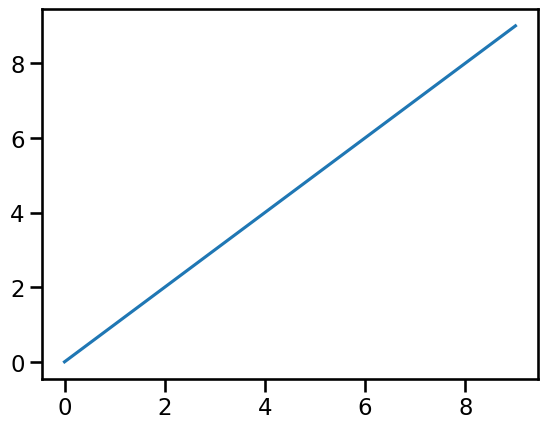

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('pandas1book') 
sns.set_context('talk')
plt.plot(range(10))

<AxesSubplot: xlabel='year'>

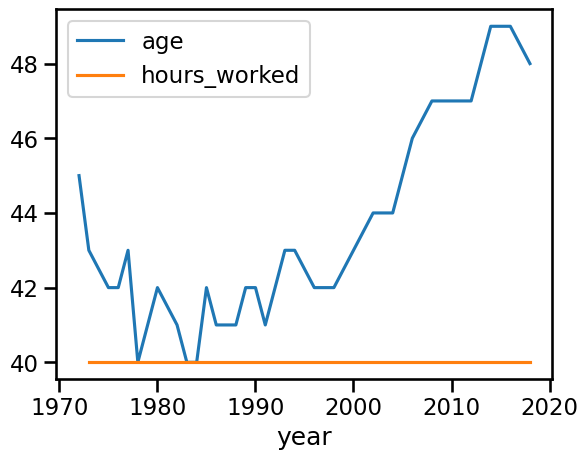

In [44]:
(gss2
   .groupby('year')
   [['age', 'hours_worked']]
   .median()
   .plot()
)

<AxesSubplot: xlabel='year'>

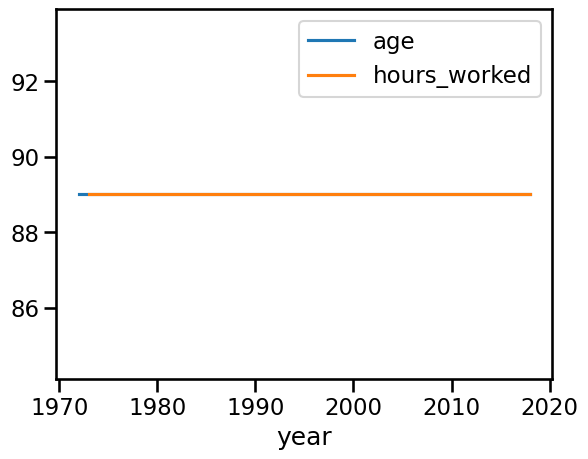

In [45]:
(gss2
   .groupby('year')
   [['age', 'hours_worked']]
   #.mean()
   #.median()
   #.std()
   .max()
   .plot()
)

<AxesSubplot: xlabel='year,sex'>

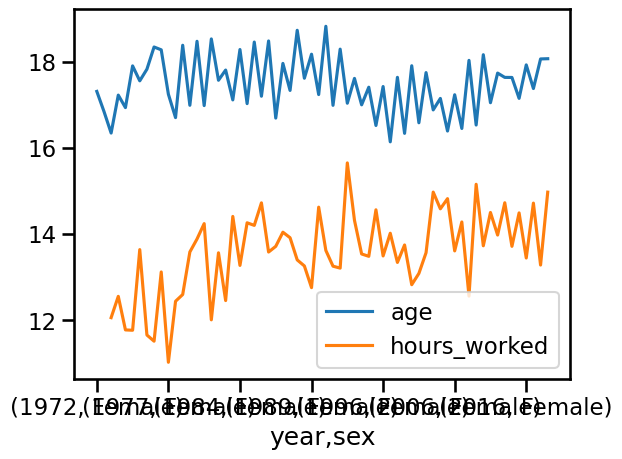

In [50]:
# add sex
(gss2
   .groupby(['year', 'sex'])
   [['age', 'hours_worked']]
   #.mean()
   #.median()
   .std()
   #.max()
   .plot()
)

In [ ]:
# add sex
(gss2
   .groupby(['year', 'sex'])
   [['age', 'hours_worked']]
   .mean()
   #.median()
   #.std()
   #.max()
   .plot()
)

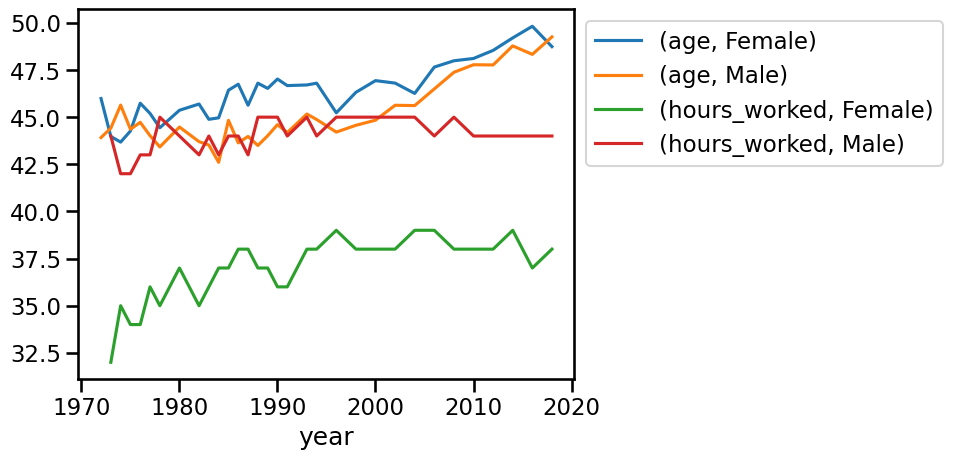

In [55]:
# unstack
(gss2
   .groupby(['year', 'sex'])
   [['age', 'hours_worked']]
   .mean()
   #.median()
   #.std()
   #.max()
   .unstack() 
   .plot()
 .legend(bbox_to_anchor=(1,1))
)

In [56]:
(gss2
   .groupby(['year', 'sex'])
   [['age', 'hours_worked']]
   .mean()
   .unstack()
   .age
)

sex,Female,Male
year,,
1972,45.987547,43.916770
1973,43.974969,44.417974
1974,43.676806,45.638607
1975,44.265031,44.359701
1976,45.739709,44.725637
1977,45.196407,44.015988
1978,44.438279,43.420561
1980,45.365526,44.475819
1982,45.696545,43.700258


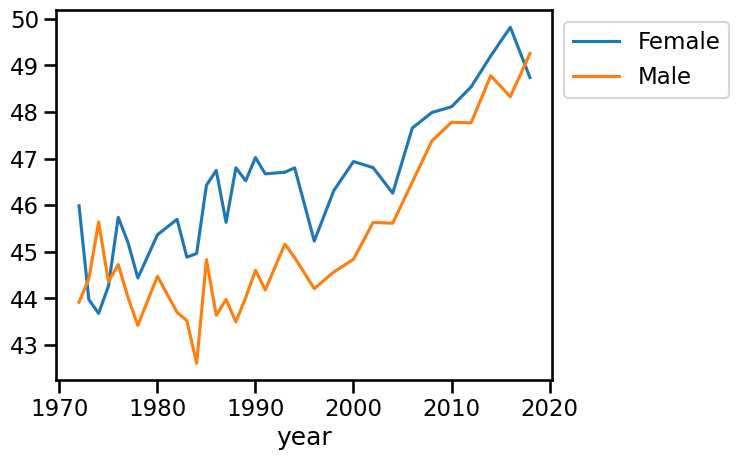

In [57]:
(gss2
   .groupby(['year', 'sex'])
   [['age', 'hours_worked']]
   .mean()
   .unstack()
   .age
   .plot()
   .legend(bbox_to_anchor=(1,1))
)

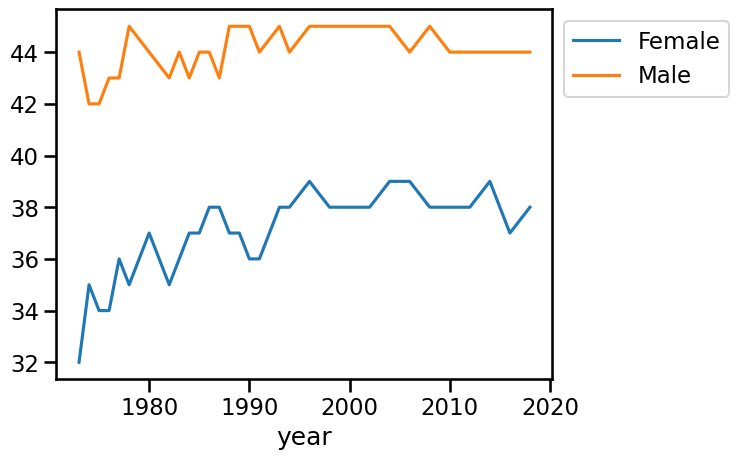

In [58]:
# Let's try looking at hours worked
(gss2
   .groupby(['year', 'sex'])
   [['age', 'hours_worked']]
   .mean()
   .unstack()
   .hours_worked
   .plot()
   .legend(bbox_to_anchor=(1,1))
)

In [59]:
# Multiple aggregates
def second(group):
    return group.iloc[1]
(gss2
   .groupby(['year', 'sex'])
   [['age', 'hours_worked']]
  .agg(['min', 'max', 'mean', second])
   
)

age                       hours_worked                   
            min max       mean second          min   max  mean second
year sex                                                             
1972 Female  18  89  45.987547     48         <NA>  <NA>  <NA>   <NA>
     Male    18  89  43.916770     26         <NA>  <NA>  <NA>   <NA>
1973 Female  18  86  43.974969     36            1    80    32     40
     Male    18  89  44.417974     32            0    89    44     40
1974 Female  18  89  43.676806     69            8    89    35   <NA>
...          ..  ..        ...    ...          ...   ...   ...    ...
2014 Male    18  89  48.779438     59            1    89    44   <NA>
2016 Female  18  89  49.818927     55            1    89    37      5
     Male    18  89  48.329403     61            1    89    44     42
2018 Female  18  89  48.740712     63            1    89    38     40
     Male    18  89  49.255481     42            1    89    44     40

[64 rows x 8 columns]

## Aggregation Exercise
* Which occupation has the highest median hours worked?
* Which occupation has the lowest age?
* What is the breakdown of respondents by race for each year?
* Convert the previous to a percentage.
* How many unique occupations are there for each year?
* What is the most popular college_major for each year?
* What is the second most popular college_major for each year?

In [88]:
# * Which occupation has the highest median hours worked?
(gss
 .groupby('OCC')
 .HRS1
 .median()
 .sort_values()
 .dropna()
)

OCC
605     8
945     8
175    10
262    12
960    12
       ..
65     60
760    60
802    60
580    65
712    66
Name: HRS1, Length: 400, dtype: uint8[pyarrow]

In [91]:
# * Which occupation has the lowest age?
(gss
 .groupby('OCC')
 .AGE
 .median() # or min
 #.min()
 .sort_values()
 .dropna()
)

OCC
911    20.0
572    22.0
431    22.0
763    22.0
953    22.0
       ... 
403    72.0
442    75.5
34     77.0
444    82.0
132    89.0
Name: AGE, Length: 414, dtype: float64

<AxesSubplot: xlabel='YEAR'>

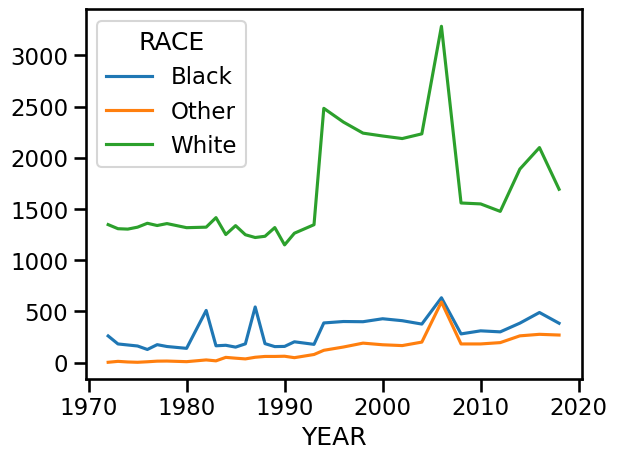

In [96]:
#* What is the breakdown of respondents by race for each year?
(gss
 .groupby(['YEAR', 'RACE'])
 .size()
 .unstack()
 .plot()
)


In [103]:
#* What is the breakdown of respondents by race for each year?
#* Convert the previous to a percentage.

(gss
 .groupby(['YEAR', 'RACE'])
 .size()
 .unstack()
 .pipe(lambda df_: df_.div(df_.sum(axis='columns'), axis='index'))
 .mul(100)
)


RACE,Black,Other,White
YEAR,,,
1972,16.181029,0.247985,83.570986
1973,12.167553,0.864362,86.968085
1974,11.657682,0.471698,87.870620
1975,10.939597,0.268456,88.791946
1976,8.605737,0.600400,90.793863
1977,11.503268,0.980392,87.516340
1978,10.313316,1.044386,88.642298
1980,9.536785,0.681199,89.782016
1982,27.419355,1.451613,71.129032


In [105]:
#* How many unique occupations are there for each year?
(gss
 .groupby(['YEAR'])
 .OCC
 .nunique()
)

YEAR
1972    259
1973    259
1974    266
1975    248
1976    251
1977    262
1978    250
1980    254
1982    247
1983    262
1984    241
1985    271
1986    267
1987    275
1988    268
1989    275
1990    250
1991      1
1993      1
1994      1
1996      1
1998      1
2000      1
2002      1
2004      1
2006      1
2008      1
2010      1
2012      1
2014      1
2016      1
2018      1
Name: OCC, dtype: int64

In [106]:
#* What is the most popular college_major for each year?
(gss
 .groupby('YEAR')
 .MAJOR1
 .agg(lambda g: g.value_counts().index[0])
)

YEAR
1972    No answer
1973    No answer
1974    No answer
1975    No answer
1976    No answer
1977    No answer
1978    No answer
1980    No answer
1982    No answer
1983    No answer
1984    No answer
1985    No answer
1986    No answer
1987    No answer
1988    No answer
1989    No answer
1990    No answer
1991    No answer
1993    No answer
1994    No answer
1996    No answer
1998    No answer
2000    No answer
2002    No answer
2004    No answer
2006    No answer
2008    No answer
2010    No answer
2012    No answer
2014    No answer
2016    No answer
2018    No answer
Name: MAJOR1, dtype: object

In [108]:
#* What is the second most popular college_major for each year?
(gss
 .groupby('YEAR')
 .MAJOR1
 .agg(lambda g: g.value_counts().index[1])
)

YEAR
1972     Accounting/bookkeeping
1973     Accounting/bookkeeping
1974     Accounting/bookkeeping
1975     Accounting/bookkeeping
1976     Accounting/bookkeeping
1977     Accounting/bookkeeping
1978     Accounting/bookkeeping
1980     Accounting/bookkeeping
1982     Accounting/bookkeeping
1983     Accounting/bookkeeping
1984     Accounting/bookkeeping
1985     Accounting/bookkeeping
1986     Accounting/bookkeeping
1987     Accounting/bookkeeping
1988     Accounting/bookkeeping
1989     Accounting/bookkeeping
1990     Accounting/bookkeeping
1991     Accounting/bookkeeping
1993     Accounting/bookkeeping
1994     Accounting/bookkeeping
1996     Accounting/bookkeeping
1998     Accounting/bookkeeping
2000     Accounting/bookkeeping
2002     Accounting/bookkeeping
2004     Accounting/bookkeeping
2006     Accounting/bookkeeping
2008     Accounting/bookkeeping
2010     Accounting/bookkeeping
2012    Business administration
2014    Business administration
2016    Business administration
201

In [85]:
gss.columns

Index(['YEAR', 'ID', 'AGE', 'HRS1', 'OCC', 'MAJOR1', 'SEX', 'RACE', 'BORN',
       'INCOME', 'INCOME06', 'HONEST', 'TICKET', 'INCOME INT'],
      dtype='object')

In [74]:
(gss
 .query('MAJOR1 != "No answer"')
 .groupby(['YEAR', 'MAJOR1'])
 .size()
 .unstack()
 .T
 .idxmax()
)

YEAR
2012    Business administration
2014    Business administration
2016    Business administration
2018    Business administration
dtype: object

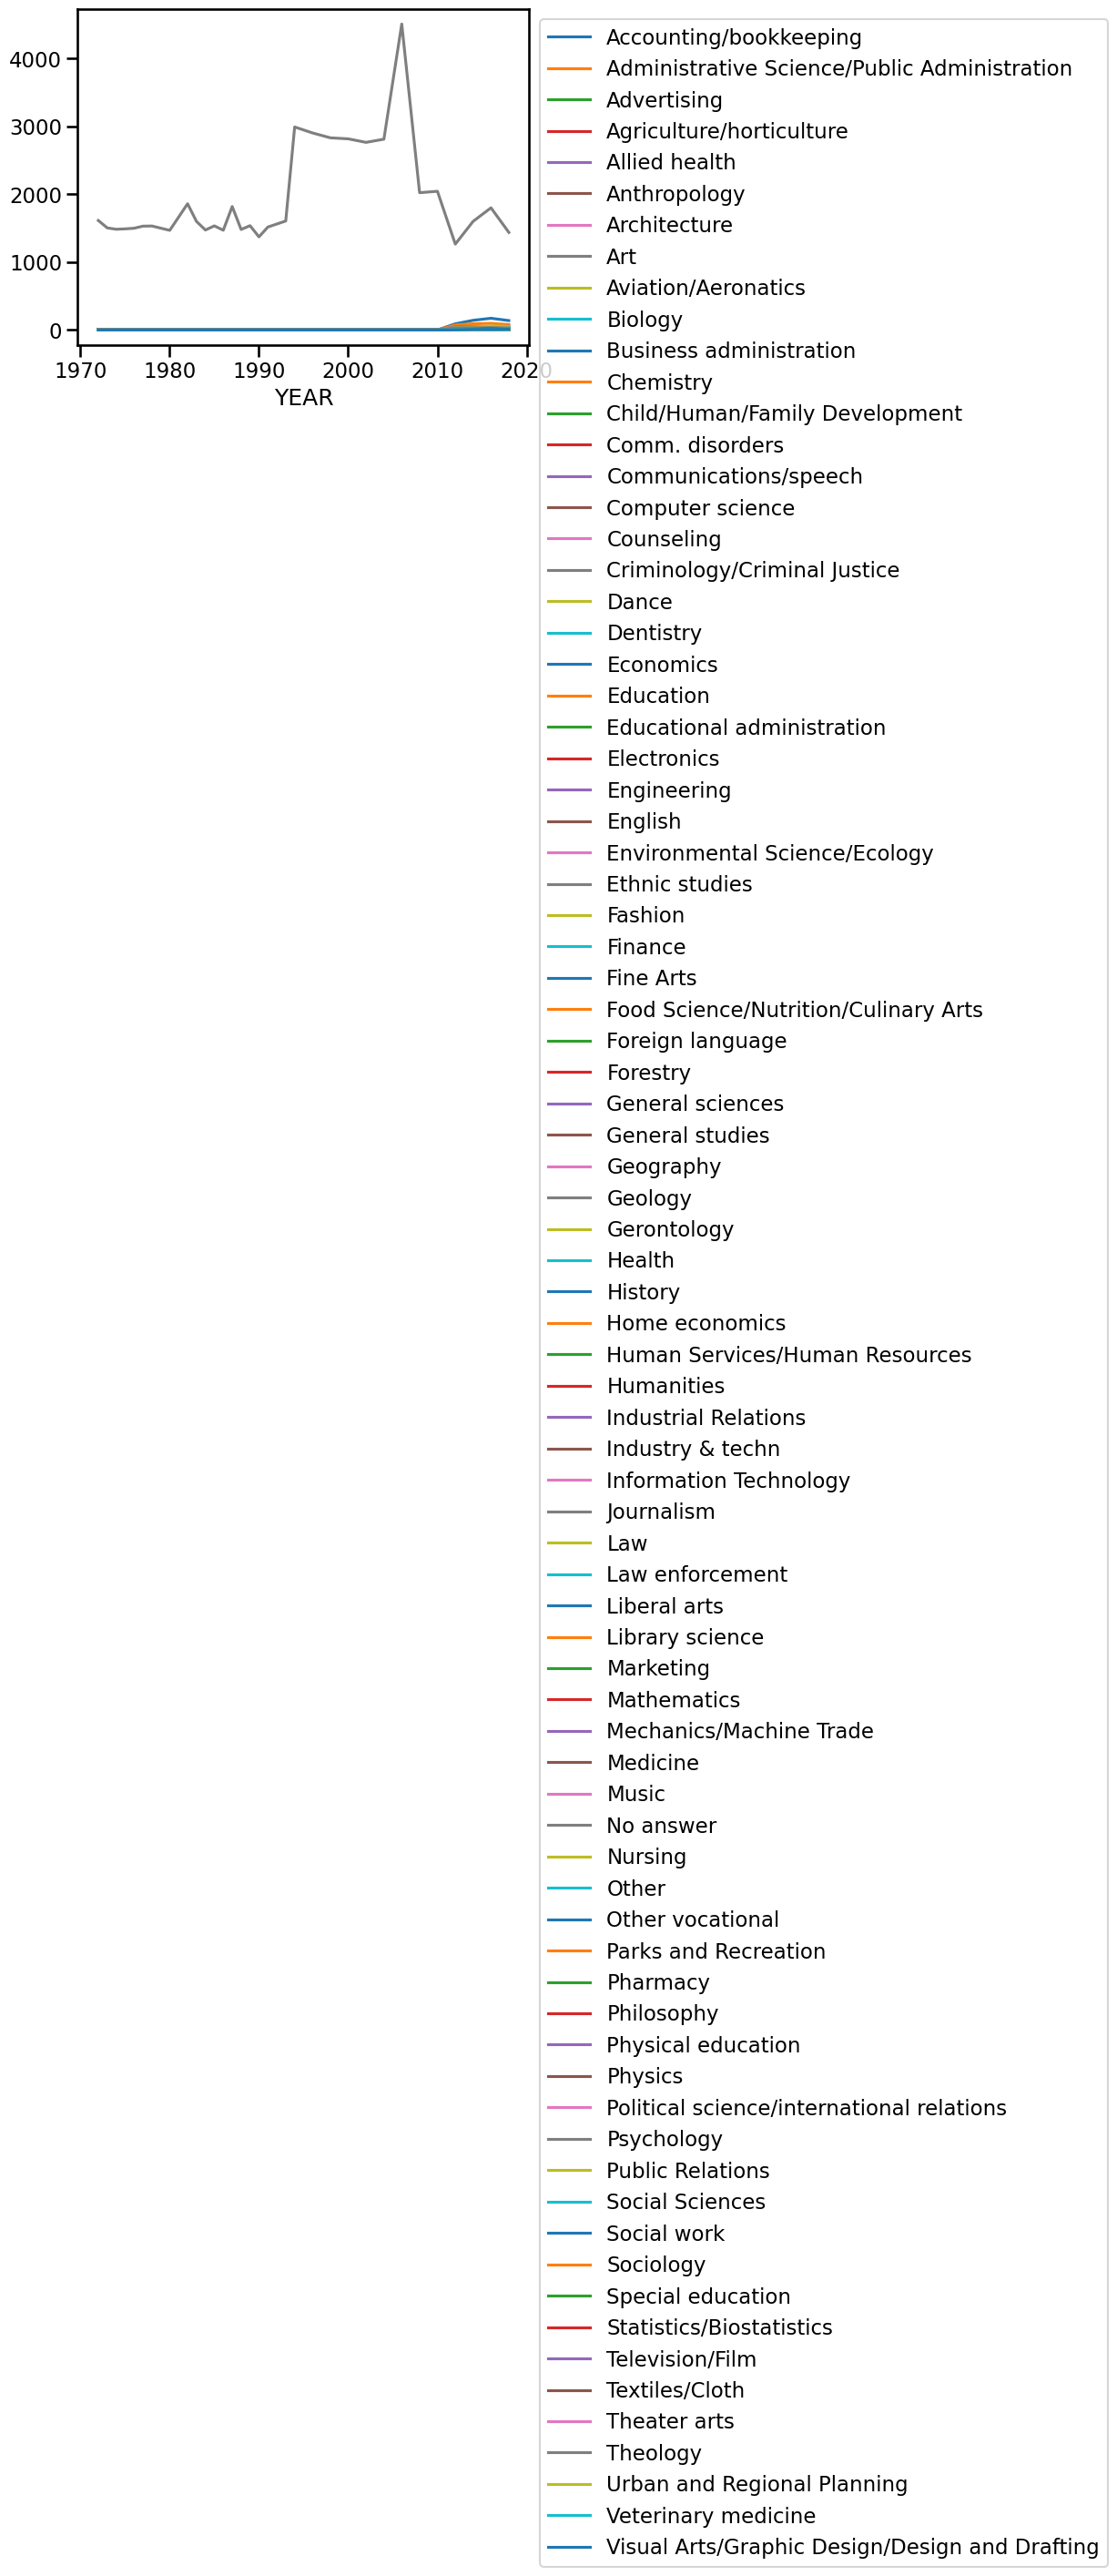

In [70]:
(gss
 .groupby(['YEAR', 'MAJOR1'])
 .size()
 .unstack()
 .plot()
 .legend(bbox_to_anchor=(1,1))
)

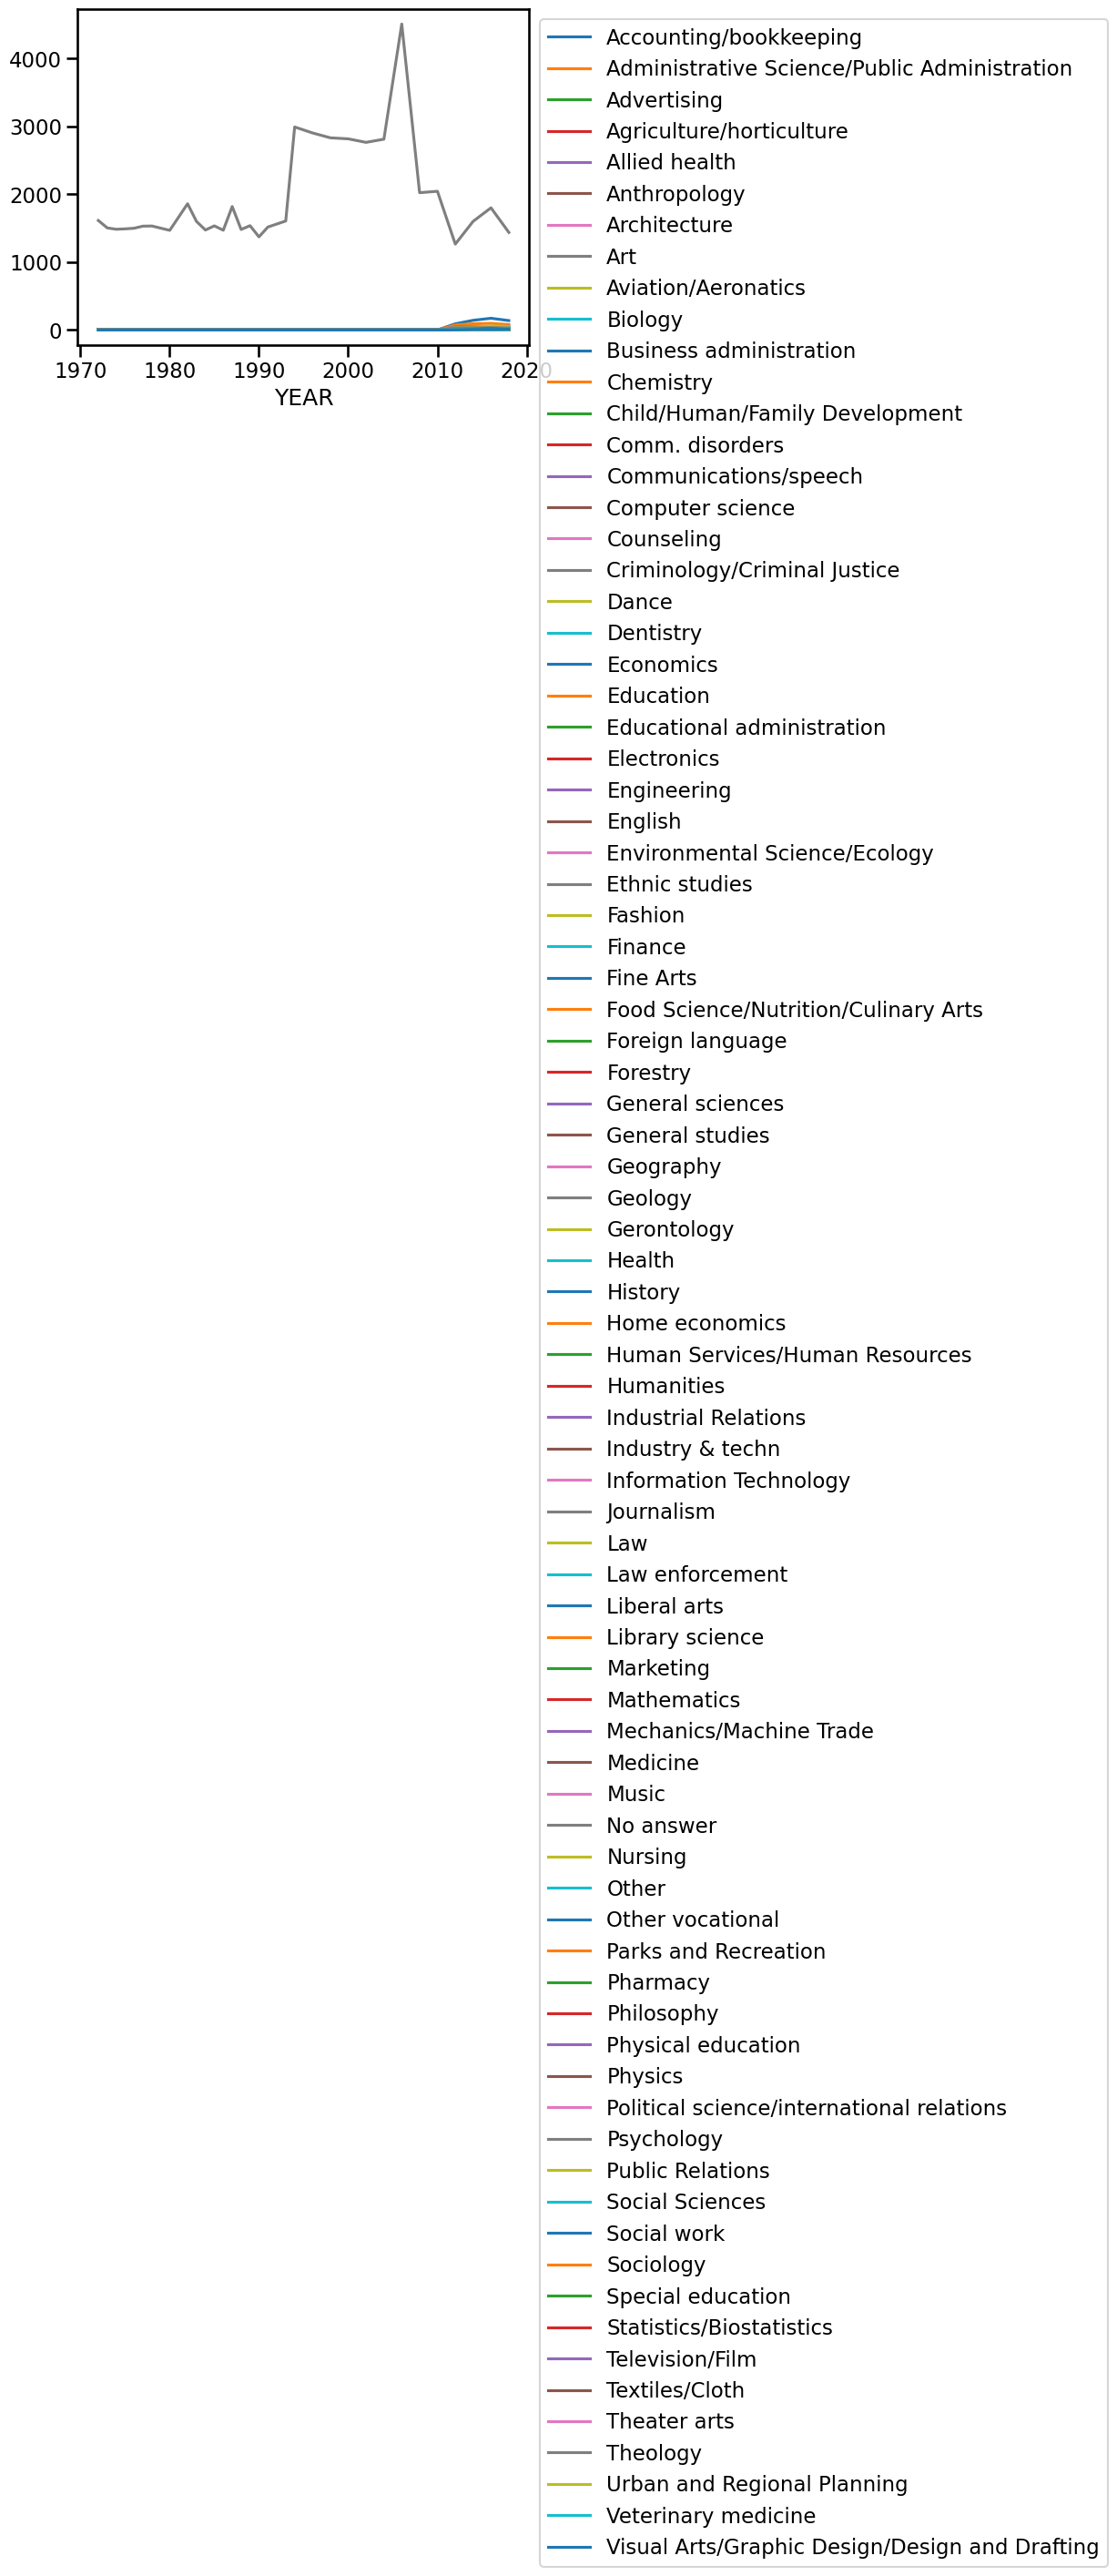

In [70]:
(gss
 .groupby(['YEAR', 'MAJOR1'])
 .size()
 .unstack()
 .plot()
 .legend(bbox_to_anchor=(1,1))
)

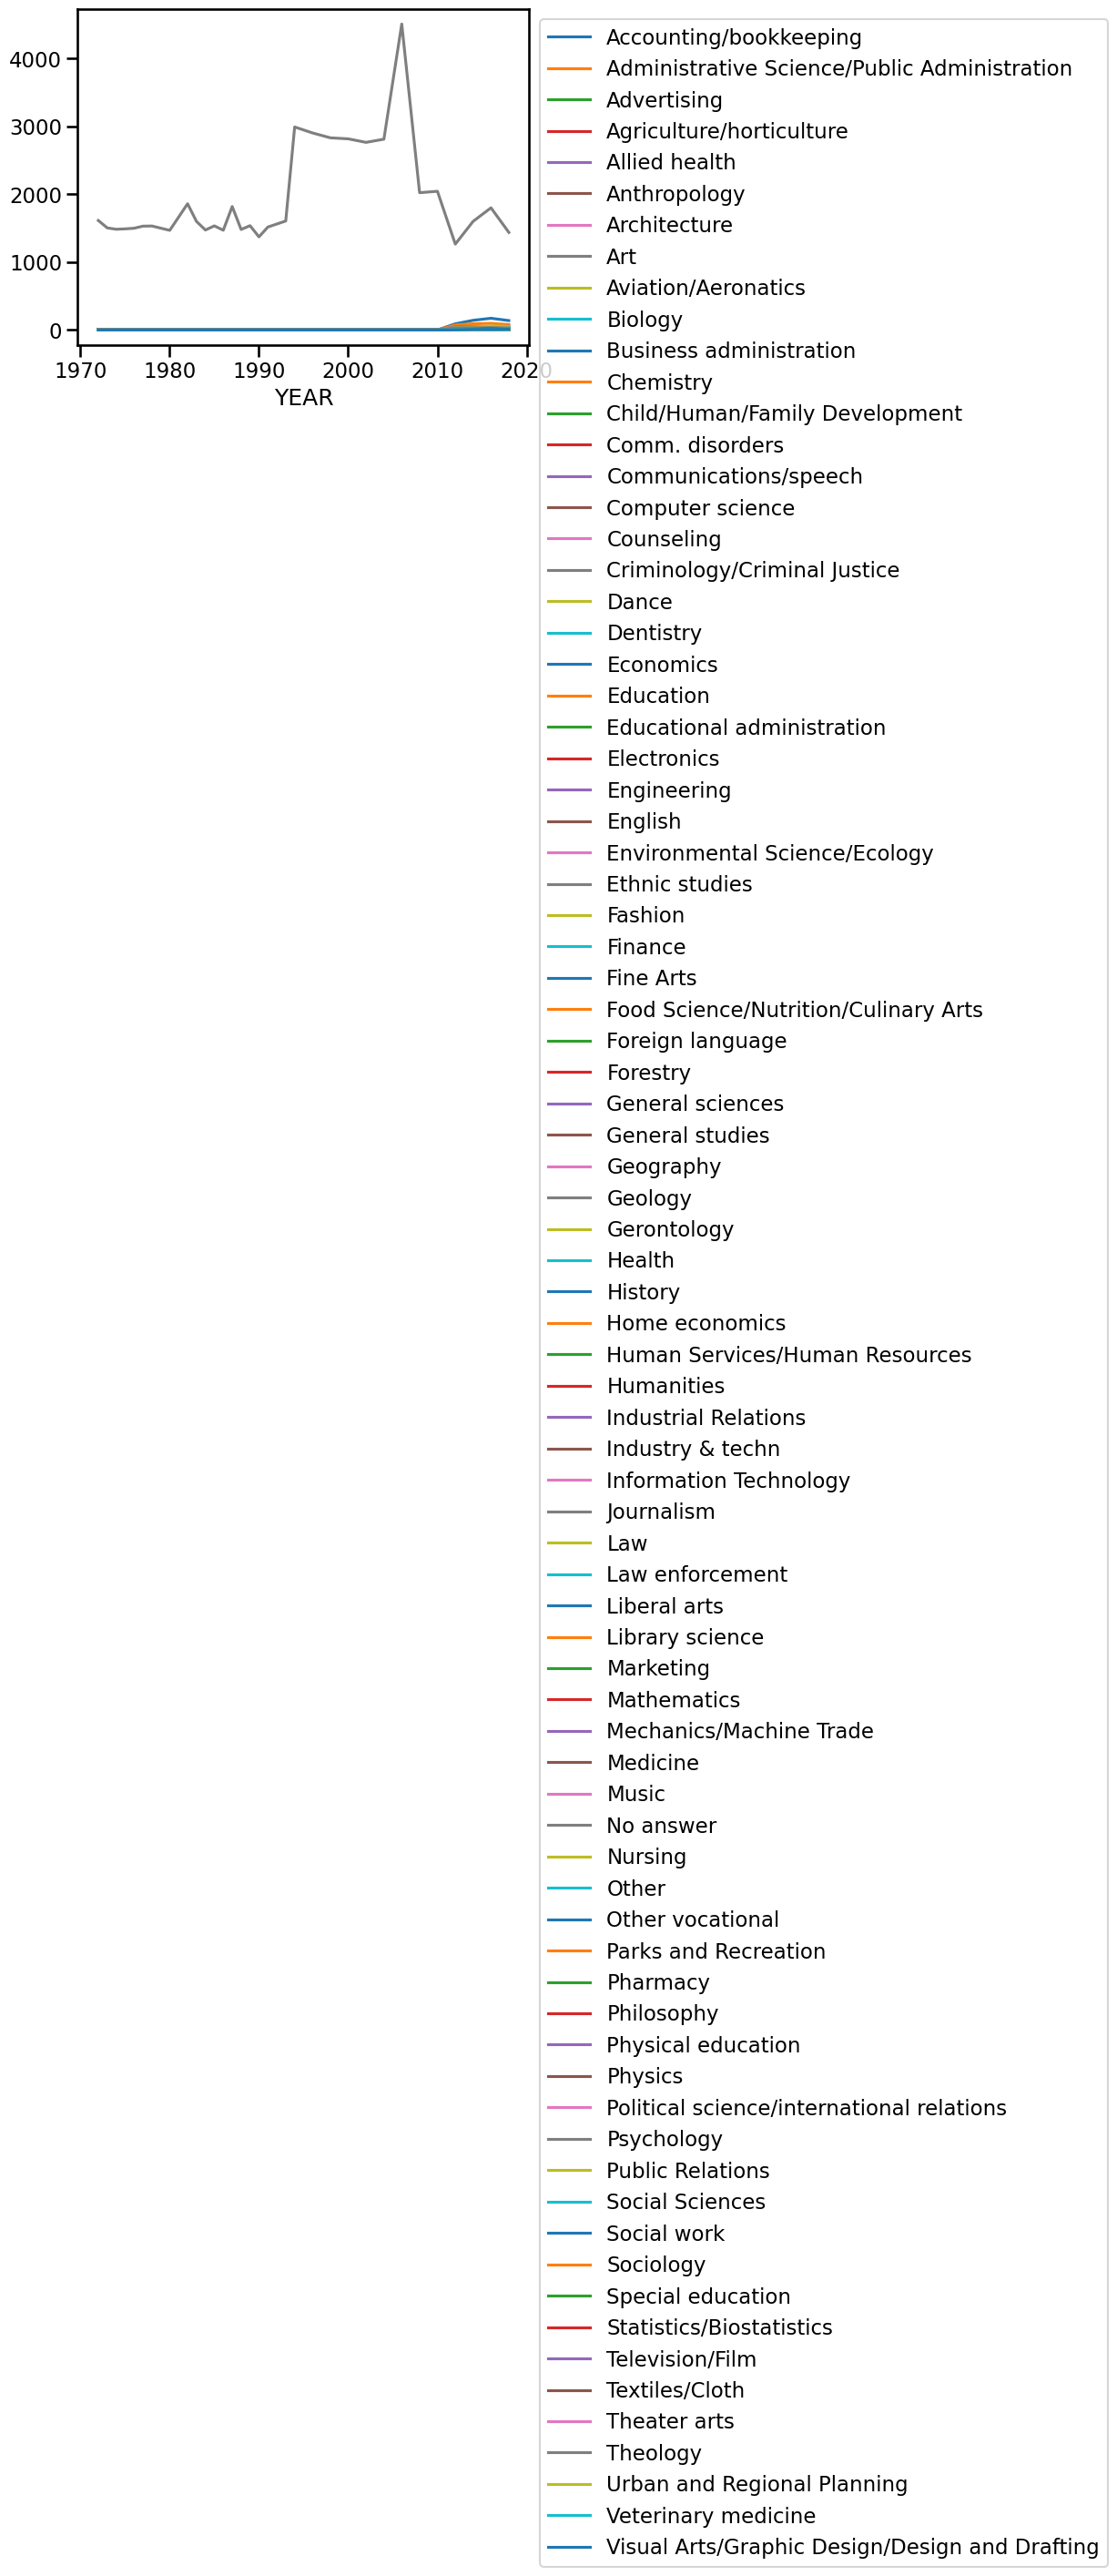

In [72]:
(gss
 .groupby(['YEAR', 'MAJOR1'])
 .size()
 .unstack()
 .plot()
 .legend(bbox_to_anchor=(1,1))
)

In [64]:
(gss
.groupby('YEAR')
.MAJOR1
.value_counts()
.unstack()
)

MAJOR1,Accounting/bookkeeping,Administrative Science/Public Administration,Advertising,Agriculture/horticulture,Allied health,Anthropology,Architecture,Art,Aviation/Aeronatics,Biology,...,Sociology,Special education,Statistics/Biostatistics,Television/Film,Textiles/Cloth,Theater arts,Theology,Urban and Regional Planning,Veterinary medicine,Visual Arts/Graphic Design/Design and Drafting
YEAR,,,,,,,,,,,,,,,,,,,,,
1972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
def second_val(g):
    #return g.value_counts().index[1]
    return g.value_counts().iloc[:1]

(gss2
 .groupby('year')
 .college_major
 #.value_counts()
 .agg(second_val)
)

year
1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1265
2014    1601
2016    1800
2018    1438
Name: college_major, dtype: int64

In [81]:
def top_val(g):
    return g.value_counts().index[0]
gss2.groupby('year').college_major.agg(top_val)

year
1972    No answer
1973    No answer
1974    No answer
1975    No answer
1976    No answer
1977    No answer
1978    No answer
1980    No answer
1982    No answer
1983    No answer
1984    No answer
1985    No answer
1986    No answer
1987    No answer
1988    No answer
1989    No answer
1990    No answer
1991    No answer
1993    No answer
1994    No answer
1996    No answer
1998    No answer
2000    No answer
2002    No answer
2004    No answer
2006    No answer
2008    No answer
2010    No answer
2012    No answer
2014    No answer
2016    No answer
2018    No answer
Name: college_major, dtype: object

In [ ]:
(gss2
 .assign(income = gss2.income_1970.replace('No answer', np.nan).astype('int16[pyarrow]'))
 .groupby(['year', 'occupation'])
 .income
 .transform('mean')
 #.isna()
 #.mean()
)

In [ ]:
(gss2
 .groupby('year')
 .occupation
 .nunique()
 .plot()
)

In [ ]:
(gss2
 .groupby('year')
 .race
 .value_counts()
 .unstack()
 .pipe(lambda df: df.div(df.sum(axis='columns'), axis='index'))
 .mul(100)
 .round(0)
 .plot()
)

In [ ]:
(gss2
 .groupby('occupation')
 .age
 .mean()
 .sort_values()
# .plot()
 .plot.bar()
)

In [ ]:
(gss2
 .groupby('occupation')
 .hours_worked
 .median()
 .sort_values()
 .dropna()
)

In [ ]:
(gss2
 .assign(income = gss2.income_1970.replace('No answer', np.nan).astype('int16[pyarrow]'))
 .income
 .isna()
 .mean()
)

In [ ]:
gss2.income_1970

In [ ]:
gss2

In [ ]:
def top_val(g):
    return g.value_counts().index[0]
gss2.groupby('year').college_major.agg(top_val)

In [ ]:
def second_val(g):
    return g.value_counts().index[1]
gss2.groupby('year').college_major.agg(second_val)

In [65]:
gss2.groupby('year').college_major.value_counts().unstack()

college_major,Accounting/bookkeeping,Administrative Science/Public Administration,Advertising,Agriculture/horticulture,Allied health,Anthropology,Architecture,Art,Aviation/Aeronatics,Biology,...,Sociology,Special education,Statistics/Biostatistics,Television/Film,Textiles/Cloth,Theater arts,Theology,Urban and Regional Planning,Veterinary medicine,Visual Arts/Graphic Design/Design and Drafting
year,,,,,,,,,,,,,,,,,,,,,
1972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
gss2.groupby('year').race.value_counts().unstack()

## Summary

* Correct types save space and enable convenient math, string, and date functionality
* Chaining operations will:
   * Make code readable
   * Remove bugs
   * Easier to debug
* Don't mutate (there's no point). Embrace chaining.
* ``.apply`` is slow for math
* Aggregations are powerful. Play with them until they make sense

Follow on Twitter ``@__mharrison__``

Book giveaway!

In [78]:
import random
random.randrange(1,9)

1